# Forecasting a Time Series 


### Data loading & Processing 

In [10]:
%matplotlib inline
import pandas as pd


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


#data = pd.read_csv("./Data/sample.csv",index_col=0)
data = pd.read_csv("./Data/sales_of_new_onefamily_houses.csv",index_col=0) 

data.head()

,Sales of new one-family houses
Month,
1987-01,53
1987-02,59
1987-03,73
1987-04,72
1987-05,62


In [11]:
data.index

Index(['1987-01', '1987-02', '1987-03', '1987-04', '1987-05', '1987-06',
       '1987-07', '1987-08', '1987-09', '1987-10',
       ...
       '1995-02', '1995-03', '1995-04', '1995-05', '1995-06', '1995-07',
       '1995-08', '1995-09', '1995-10', '1995-11'],
      dtype='object', name='Month', length=107)

In [12]:
data.index = pd.to_datetime(data.index)

In [13]:
data.head()

,Sales of new one-family houses
Month,
1987-01-01,53
1987-02-01,59
1987-03-01,73
1987-04-01,72
1987-05-01,62


In [14]:
data.index

DatetimeIndex(['1987-01-01', '1987-02-01', '1987-03-01', '1987-04-01',
               '1987-05-01', '1987-06-01', '1987-07-01', '1987-08-01',
               '1987-09-01', '1987-10-01',
               ...
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01', '1995-08-01', '1995-09-01',
               '1995-10-01', '1995-11-01'],
              dtype='datetime64[ns]', name='Month', length=107, freq=None)

In [18]:
data.columns = ['Value']

In [19]:
data.tail()

,Value
Month,
1995-07-01,64
1995-08-01,63
1995-09-01,55
1995-10-01,54
1995-11-01,44


### ARIMA Time Series Model Setting 

In [20]:
import itertools

# S_period: periodicity of the time series (4 for quarterly periods, 12 for yearly periods for monthly data, etc.)
S_period = 12

# Define the p, d and q parameters to take any value between 0 and 2
#p = d = q = range(0, 5)

p = range(0, 2)
d = range(0, 2)
q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], S_period) for x in list(itertools.product(p, d, q))]

In [21]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

###  Parameter Selection for the ARIMA Time Series Model

In [22]:
import warnings
import statsmodels.api as sm
import numpy as np
import time


warnings.filterwarnings("ignore") # specify to ignore warning messages


cnt_loop = 0


aic_table = pd.DataFrame(np.zeros((len(pdq), len(seasonal_pdq))), index = pdq, columns = seasonal_pdq)

print("Time mearuse started.")
startTime = time.time()
                         
for param in pdq:
    for param_seasonal in seasonal_pdq:

        mod = sm.tsa.statespace.SARIMAX(data,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

        results = mod.fit()


        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

        aic_table[param, param_seasonal] = results.aic

        if cnt_loop == 0:
            min_aic = results.aic
            min_aic_param = param
            min_aic_param_seasonal = param_seasonal

        if results.aic < min_aic:
            min_aic = results.aic
            min_aic_param = param
            min_aic_param_seasonal = param_seasonal          
        cnt_loop = cnt_loop + 1             

            


endTime = time.time() - startTime
print("Spent time:", endTime) 

print("Minimum AIC value:", min_aic) 

Time mearuse started.
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1144.731304797869
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:926.6058888780148
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:653.244716081879
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:577.1056648867585
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:661.9490699815565
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:654.6320423625566
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:585.1805648600226
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:571.6576374768745
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1004.5226223130998
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:806.8403248317236
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:599.1839360537364
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:514.7272246854313
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:613.224235753116
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:591.353169317827
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:537.1919122080085
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:516.429114886887
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:680.6261818124138
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:584.74853

In [23]:
min_combination = {"min_aic":min_aic, "min_aic_param":min_aic_param, "min_aic_param_seasonal":min_aic_param_seasonal}


print(min_combination)


{'min_aic': 467.81563504429596, 'min_aic_param': (1, 1, 1), 'min_aic_param_seasonal': (0, 1, 1, 12)}


### Fitting an ARIMA Time Series Model

In [24]:


mod = sm.tsa.statespace.SARIMAX(data,
                                order=min_aic_param,
                                seasonal_order=min_aic_param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()


print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4580      0.290      1.580      0.114      -0.110       1.026
ma.L1         -0.7460      0.204     -3.663      0.000      -1.145      -0.347
ma.S.L12      -1.0000   2528.372     -0.000      1.000   -4956.519    4954.519
sigma2        14.7653   3.73e+04      0.000      1.000   -7.32e+04    7.32e+04


### Diagnosis of model

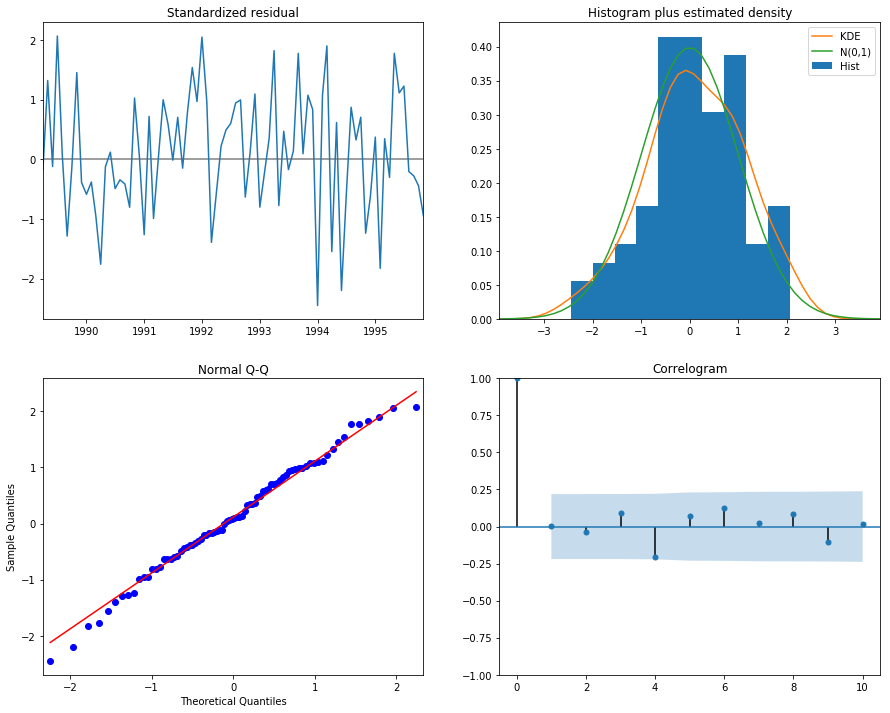

In [25]:
import matplotlib.pyplot as plt

results.plot_diagnostics(figsize=(15, 12))
plt.show()

### Prediction time, Plot time setting

In [27]:

PREDICTION_START_DATETIME = pd.to_datetime('1995-01-01')

PLOT_START_DATE = '1985-01-01'


### Validating Forecasts (Static)

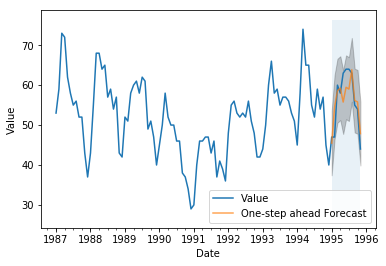

In [28]:

pred = results.get_prediction(start=PREDICTION_START_DATETIME, dynamic=False)
"""
The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.
"""

# confidence intervals for forcasts of the time series 
pred_ci = pred.conf_int()



# plotting forcast result


ax = data[PLOT_START_DATE:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.fill_betweenx(ax.get_ylim(), PREDICTION_START_DATETIME, data.index[-1],
                 alpha=.1, zorder=-1)


ax.set_xlabel('Date')
ax.set_ylabel('Value')
plt.legend()

plt.show()




### Generating table including all information (Static)

In [29]:
df_true_value = data.copy()
df_true_value.columns = ['Value']

df_predicted_mean = pd.DataFrame(pred.predicted_mean)
df_predicted_mean.index = pd.to_datetime(df_predicted_mean.index)
df_predicted_mean.index.name = 'DATE'
df_predicted_mean.columns = ['Predicted value']
df_pred_ci = pred_ci.copy()
df_pred_ci.index = pd.to_datetime(df_pred_ci.index)
df_pred_ci.index.name = 'DATE'

#df['Abnomal'] = df[]

#result = left.join(right, how='outer')
df = df_true_value.join(df_predicted_mean, how = 'outer')
df = df.join(df_pred_ci, how = 'outer')

### Calculating MSE, MAPE (Static)

In [30]:

y_forecasted = df.loc[PREDICTION_START_DATETIME:, 'Predicted value'].values
y_truth = df.loc[PREDICTION_START_DATETIME:, 'Value'].values

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Compute the mean square error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_truth, y_forecasted)
print('The Mean Absolute Percentage Error of our forecasts is {}'.format(round(mape, 2)))

The Mean Squared Error of our forecasts is 16.36
The Mean Absolute Percentage Error of our forecasts is 5.96


### Validating Forecasts (Dynamic)

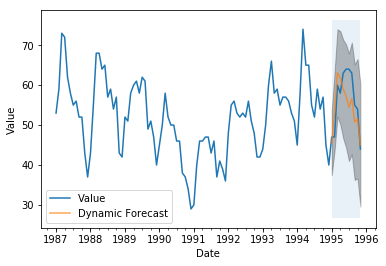

In [31]:
"""Dynamic forecast: only use information from the time series up to a certain point, and after that,
                     forecasts are generated using values from previous forecasted time points.
"""


pred_dynamic = results.get_prediction(start=PREDICTION_START_DATETIME, dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()


ax = data[PLOT_START_DATE:].plot(label='observed')
pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic Forecast', alpha=.7)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), PREDICTION_START_DATETIME, data.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.legend()

plt.show()


### Generating table including all information (Dynamic)

In [32]:
df_true_value = data.copy()
df_true_value.columns = ['Value']

df_dynamic_predicted_mean = pd.DataFrame(pred_dynamic.predicted_mean)
df_dynamic_predicted_mean.index = pd.to_datetime(df_dynamic_predicted_mean.index)
df_dynamic_predicted_mean.index.name = 'DATE'
df_dynamic_predicted_mean.columns = ['Predicted value']
df_dynamic_pred_ci = pred_dynamic_ci.copy()
df_dynamic_pred_ci.index = pd.to_datetime(df_dynamic_pred_ci.index)
df_dynamic_pred_ci.index.name = 'DATE'

#df['Abnomal'] = df[]

#result = left.join(right, how='outer')
df_dynamic = df_true_value.join(df_dynamic_predicted_mean, how = 'outer')
df_dynamic = df_dynamic.join(df_dynamic_pred_ci, how = 'outer')

### Calculating MSE, MAPE (Dynamic)

In [33]:
y_forecasted = df_dynamic.loc[PREDICTION_START_DATETIME:, 'Predicted value'].values
y_truth = df_dynamic.loc[PREDICTION_START_DATETIME:, 'Value'].values

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Compute the mean square error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_truth, y_forecasted)
print('The Mean Absolute Percentage Error of our forecasts is {}'.format(round(mape, 2)))

The Mean Squared Error of our forecasts is 25.8
The Mean Absolute Percentage Error of our forecasts is 7.7


### Future Forecast

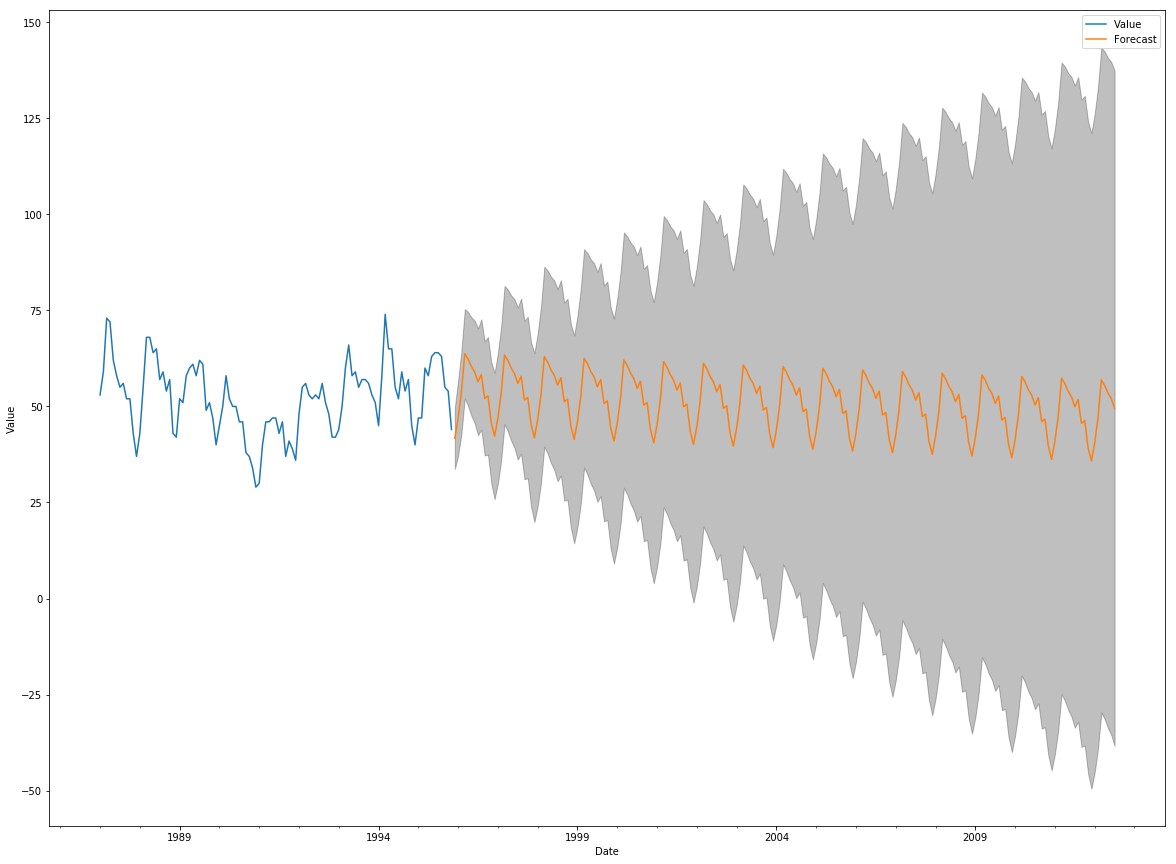

In [34]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=200)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()


ax = data.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.legend()
plt.show()

In [ ]:
#from pyramid.arima import auto_arima